In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

main_path = '/mnt/mount_zc_NAS/motion_correction/pictures/Fully3D'

# Results

In [10]:
data = pd.read_excel(os.path.join(main_path, 'comparison_list.xlsx'))
d = data.loc[data['Patient_ID'] == 'average']

In [11]:
MAE = [[d['PAR_all_mae'].values[0], d['CNN_all_mae'].values[0], d['motion_all_mae'].values[0]],  
       [d['PAR_bottom_mae'].values[0], d['CNN_bottom_mae'].values[0], d['motion_bottom_mae'].values[0]],
       [d['PAR_middle_mae'].values[0], d['CNN_middle_mae'].values[0], d['motion_middle_mae'].values[0]], 
       [d['PAR_top_mae'].values[0], d['CNN_top_mae'].values[0], d['motion_top_mae'].values[0]]]  
print(MAE)

RMSE = [[d['PAR_all_rmse'].values[0], d['CNN_all_rmse'].values[0], d['motion_all_rmse'].values[0]],  
       [d['PAR_bottom_rmse'].values[0], d['CNN_bottom_rmse'].values[0], d['motion_bottom_rmse'].values[0]],
       [d['PAR_middle_rmse'].values[0], d['CNN_middle_rmse'].values[0], d['motion_middle_rmse'].values[0]], 
       [d['PAR_top_rmse'].values[0], d['CNN_top_rmse'].values[0], d['motion_top_rmse'].values[0]]] 
print(RMSE)

SSIM = [[d['PAR_all_ssim'].values[0], d['CNN_all_ssim'].values[0], d['motion_all_ssim'].values[0]],  
       [d['PAR_bottom_ssim'].values[0], d['CNN_bottom_ssim'].values[0], d['motion_bottom_ssim'].values[0]],
       [d['PAR_middle_ssim'].values[0], d['CNN_middle_ssim'].values[0], d['motion_middle_ssim'].values[0]], 
       [d['PAR_top_ssim'].values[0], d['CNN_top_ssim'].values[0], d['motion_top_ssim'].values[0]]] 
print(SSIM)


[[37.134907958811475, 93.50298139838601, 127.97820740014643], [39.83790084579349, 96.7660153487006, 129.76507946507414], [27.5602624708391, 74.54251892651857, 101.61091367202506], [52.65037316531393, 128.98516378139996, 182.73679046097237]]
[[79.35520019099278, 185.5669727574846, 267.73438744571513], [80.1596310237408, 181.3276456973404, 261.79121077159374], [65.15799656227043, 162.4899166813885, 232.22833097391145], [100.49125604644173, 232.26526104540017, 337.05570507624617]]
[[0.9776259382830748, 0.8766714163303465, 0.761076817207174], [0.9761631591660478, 0.8663080802434804, 0.7501835838034464], [0.9816237345845449, 0.888866028025185, 0.7928291992036949], [0.9718246029522687, 0.8695794308924361, 0.7145726780010486]]


In [6]:
def process_mae(original_list):
   
    result_list = [original_list[i] - original_list[i-1] for i in range(1, len(original_list))]
    result_list.insert(0, original_list[0])
    return result_list


[-10, 10, 5, 5]


In [28]:
new_MAE = []
for i in range(0,len(MAE)):
    new_MAE.append(process_mae(MAE[i]))

new_RMSE = []
for i in range(0,len(MAE)):
    new_RMSE.append(process_mae(RMSE[i]))

new_SSIM = []
for i in range(0,len(SSIM)):
    s = np.asarray(SSIM[i])[::-1]
    new_SSIM.append(process_mae(s))
print(SSIM)
print(new_SSIM)


[[0.9776259382830748, 0.8766714163303465, 0.761076817207174], [0.9761631591660478, 0.8663080802434804, 0.7501835838034464], [0.9816237345845449, 0.888866028025185, 0.7928291992036949], [0.9718246029522687, 0.8695794308924361, 0.7145726780010486]]
[[0.761076817207174, 0.11559459912317249, 0.10095452195272825], [0.7501835838034464, 0.11612449644003398, 0.1098550789225674], [0.7928291992036949, 0.09603682882149012, 0.09275770655935989], [0.7145726780010486, 0.15500675289138743, 0.10224517205983263]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


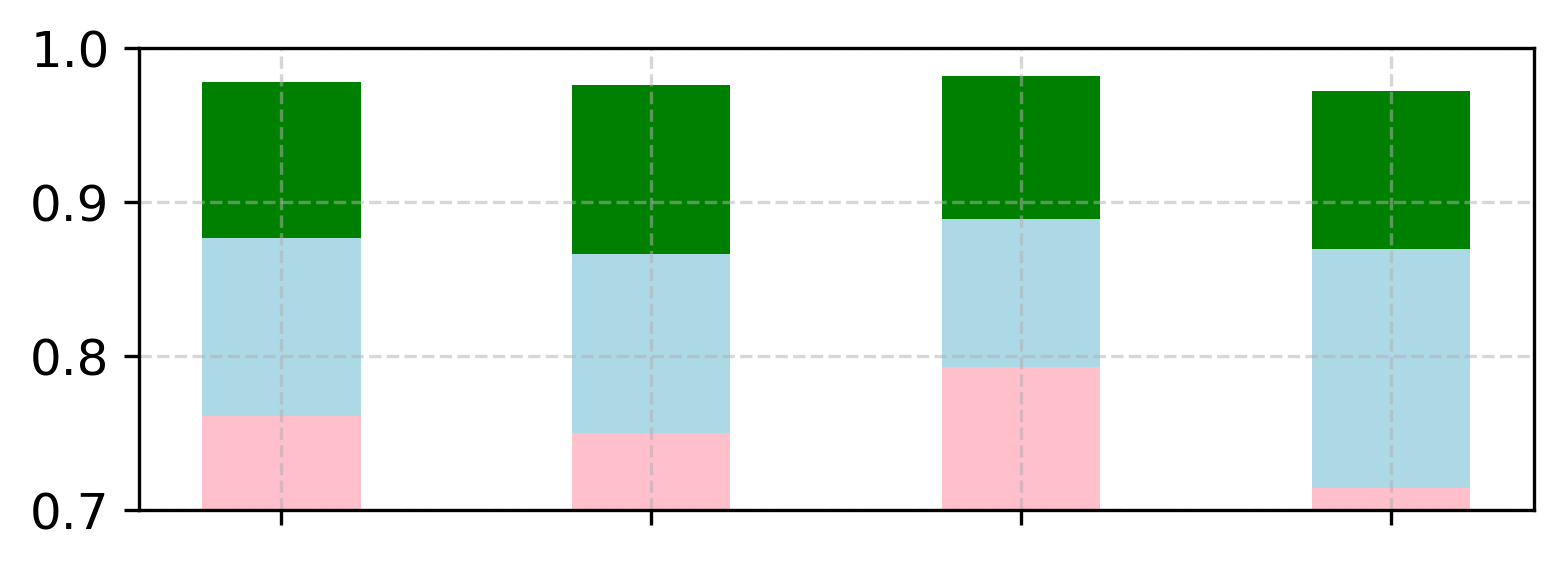

In [34]:
numbers = new_SSIM
colors = ['pink', 'lightblue', 'green']#['green', 'lightblue', 'pink']
# bar_labels = ['all_slices', '', 'Layer 3', '']
plt.figure(figsize= (6,2), dpi = 300)

positions = [0.3, 1, 1.7, 2.4]
for i in range(0,4):
    plt.bar(positions[i], numbers[i][0], width=0.3, color=colors[0])
    plt.bar(positions[i], numbers[i][1], width=0.3, color=colors[1], bottom=numbers[i][0])
    plt.bar(positions[i], numbers[i][2], width=0.3, color=colors[2], bottom=sum(numbers[i][:2]))


# plt.ylabel('Value')
plt.xticks([0.3, 1, 1.7, 2.4],['','','',''],fontsize = 18)
plt.grid(True, linestyle='dashed', alpha=0.5)
plt.yticks(np.arange(0.7,1.01,step = 0.1),fontsize=12)
plt.ylim([0.7,1.0])
plt.savefig(os.path.join(main_path, 'image_quality_bar_plot', 'ssim.eps'),transparent=True)